In [18]:
class ArbreBinaire:
    def __init__(self,cle):
        self.cle = cle
        self.gauche = None
        self.droite = None

In [19]:
class DST :
    def __init__(self, dic , c = None):
        self.dic = dic  # Exemple : dic = {'a':'01','b':'11','c':'00','d':'10'}
        if c is None :
            self.racine = None
        else :  #On suppose que c est un caractère et que tab est un tableau de couples (caractère, caractère binaire)
            self.racine = ArbreBinaire(c)
            

    def ArbreVide(self):
        return ArbreBinaire()

    def EstArbreVide(self):
        return self.racine is None
    
    def Racine(self):
        return self.racine.cle
    
    def SousArbreGauche(self):
        return self.racine.gauche
    
    def SousArbreDroit(self):
        return self.racine.droite
    
    def car(self, c , i):
        for k , v in self.dic.items():
            if k == c and len(v)-1 >= i:
                res= v[i]
                return int(res)
        #print("Erreur : caractère non trouvé")
        return None

    def DST_Ajout(self, c ): #c est un caractère  
        return self.DST_Ajout_rang(c , 0)
    
        
    def DST_Ajout_rang(self, c , i):
        new_node = ArbreBinaire(c)
        if self.EstArbreVide(): #Si l'arbre est vide
            self.racine = new_node  
        else : 
            if self.car(c,i) == 0 : #Si le code binaire du caractère à la position i est 0
                if self.racine.gauche is None:
                    self.racine.gauche = ArbreBinaire(c)   
                else:   #Si le fils gauche de la racine n'est pas vide
                    self.DST_AjoutRec(self.racine.gauche , c , i+1) 
            if self.car(c,i) == 1 : #Si le code binaire du caractère à la position i est 1
                if self.racine.droite is None:  
                    self.racine.droite = ArbreBinaire(c)
                else:   #Si le fils droit de la racine n'est pas vide
                    self.DST_AjoutRec(self.racine.droite , c , i+1)
            else:
                return self 

    
    def DST_AjoutRec(self , A , c , i):
        if c == A.cle:  #Si le caractère est déjà présent dans l'arbre
            return self
        if self.car(c,i) == 0 :    #Si le code binaire du caractère à la position i est 0
            if A.gauche is None:   
                A.gauche = ArbreBinaire(c)
            else:  
                self.DST_AjoutRec(A.gauche , c , i+1)
        else :  #Si le code binaire du caractère à la position i est 1
            if A.droite is None:  
                A.droite = ArbreBinaire(c)
            else:   
                self.DST_AjoutRec(A.droite , c , i+1)
        return A


    def DST_Recherche(self, c): #c est un caractère
        return self.DST_Recherche_rang( self.racine, c , 0)
    
    def DST_Recherche_rang(self, A,  c , i):    #A est un arbre binaire
        if A is None: 
            return False
        if c == A.cle:    
            return True
        if self.car(c,i) == 0 :  
            return self.DST_Recherche_rang(A.gauche , c , i+1)
        else :     
            return self.DST_Recherche_rang(A.droite , c , i+1)
        
        

    def DST_Suppression(self, c): #c est un caractère
        return self.DST_Suppression_rang(self.racine, c , 0)
    
    def DST_Suppression_rang(self, A , c , i): # CBinaire est un caractère binaire, exemple : '0101'
        if A is None:   #Si l'arbre est vide
            return None
        
        if c == A.cle:      #Si le caractère est trouvé, on verifie tous les cas
            if A.gauche is None and A.droite is None:
                return None
            if A.gauche is None:   
                return A.droite
            if A.droite is None:    
                return A.gauche
            else:   #Si le noeud a deux fils
                node = self.DST_node_min(A.droite)
                A.cle = node.cle   
                A.droite = self.DST_Suppression_rang(A.droite, node.cle , i+1)  
                return A
        if self.car(c,i) == 0 :  
            A.gauche = self.DST_Suppression_rang(A.gauche , c , i+1)
        else :     
            A.droite = self.DST_Suppression_rang(A.droite , c , i+1)
        return A

    def DST_node_min(self, A ):    #A est un arbre binaire
        cur = A  
        while (cur.gauche is not None): 
            cur = cur.gauche
        return cur
        

    def DST_Construction(self):
        for c in self.dic.keys():
            self.DST_Ajout(c) 
        return self


    def afficher_arbre(self , arbre, niveau=0):
        if arbre is not None:
            self.afficher_arbre(arbre.droite, niveau + 1)
            if niveau > 0:
                print('   ' * (niveau - 1) + '|--', end='')
            print(str(arbre.cle))
            self.afficher_arbre(arbre.gauche, niveau + 1)

In [20]:
def test_DST():
    #tab = [('A','00001'),('S','10011'),('E','00101'),('R','10010'),('C','00011'),('H','01000'),('I','01001'),('N','01110'),('G','00111'),('X','11000'),('M','01101'),('P','10000'),('L','01100')]
    tab = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}
    dst = DST(tab)

    dst = dst.DST_Construction()
    # print(dst.racine.cle)   #A
    # print(dst.racine.gauche.cle)    #E
    # print(dst.racine.droite.cle)    #S
    # print(dst.racine.gauche.gauche.cle) #C
    # print(dst.racine.gauche.droite.cle) #H
    # print(dst.racine.droite.gauche.cle) #R
    # print(dst.racine.droite.droite.cle) #X
    # print(dst.racine.gauche.gauche.droite.cle)  #G
    # print(dst.racine.gauche.droite.gauche.cle)  #I
    # print(dst.racine.gauche.droite.droite.cle)  #N
    # print(dst.racine.gauche.droite.droite.gauche.cle)   #M
    # print(dst.racine.droite.gauche.gauche.cle)  #P
    # print(dst.racine.gauche.droite.droite.gauche.gauche.cle)    #L

    dst.afficher_arbre(dst.racine)

    for k in tab.keys():
        trouver = dst.DST_Recherche(k)
        print("trouver",k,"?",trouver)

    trouver = dst.DST_Recherche('B')
    print("trouver B ?",trouver)
    print("-----------------------")
    suppr = dst.DST_Suppression('E')
    trouver = dst.DST_Recherche('E')
    print("suppr E ",not(trouver))
    dst.afficher_arbre(dst.racine)

    print("-----------------------")
    suppr = dst.DST_Suppression('A')
    trouver = dst.DST_Recherche('A')
    print("suppr A ",not(trouver))
    dst.afficher_arbre(dst.racine)

test_DST()

   |--X
|--S
   |--R
      |--P
A
      |--N
         |--M
            |--L
   |--H
      |--I
|--E
      |--G
   |--C
trouver A ? True
trouver S ? True
trouver E ? True
trouver R ? True
trouver C ? True
trouver H ? True
trouver I ? True
trouver N ? True
trouver G ? True
trouver X ? True
trouver M ? True
trouver P ? True
trouver L ? True
trouver B ? False
-----------------------
suppr E  True
   |--X
|--S
   |--R
      |--P
A
      |--N
         |--M
            |--L
   |--H
|--I
      |--G
   |--C
-----------------------
suppr A  True
   |--X
|--S
   |--R
P
      |--N
         |--M
            |--L
   |--H
|--I
      |--G
   |--C


In [21]:
from graphviz import Digraph

In [22]:
def visualiser_arbre(arbre):
    dot = Digraph()

    counter = 0

    def ajouter_noeuds_et_arcs(noeud):
        nonlocal counter
        if noeud is not None:
            dot.node(str(noeud.cle))
            if noeud.gauche is not None:
                dot.edge(str(noeud.cle), str(noeud.gauche.cle) , label = "0" , fontsize="10")
                ajouter_noeuds_et_arcs(noeud.gauche)
            else:
                counter += 1
                dot.node(f"empty_{counter}", shape="point", fillcolor="black")
                dot.edge(str(noeud.cle), f"empty_{counter}" , label = "0" , fontsize="10")
            if noeud.droite is not None:
                dot.edge(str(noeud.cle), str(noeud.droite.cle) , label = "1" , fontsize="10" )
                ajouter_noeuds_et_arcs(noeud.droite)
            else:
                counter += 1
                dot.node(f"empty_{counter}", shape="point", fillcolor="black")
                dot.edge(str(noeud.cle), f"empty_{counter}" , label = "1" , fontsize="10")

    ajouter_noeuds_et_arcs(arbre)
    return dot


TEST

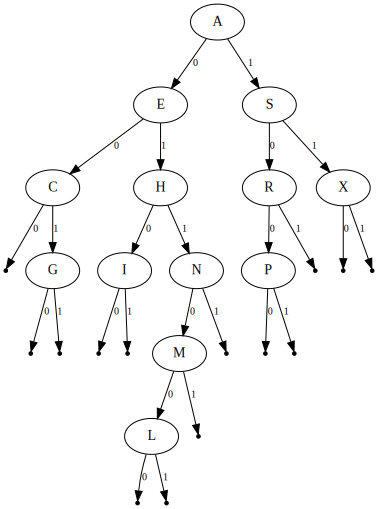

In [23]:
tab = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}
dst_arbre = DST(tab)
dst_arbre = dst_arbre.DST_Construction()
visualiser_arbre(dst_arbre.racine)
